In [11]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
path_to_csv = '/content/gdrive/MyDrive/Keras_ICP6/diabetes.csv'

In [14]:
# 1. Use the use case in the class:
    #a. Add more Dense layers to the existing code and check how the accuracy changes.

import keras
import pandas
from keras.models import Sequential
from keras.layers import Dense, Activation

# load dataset
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8],
                                                    test_size=0.25, random_state=87)
np.random.seed(155)
my_first_nn = Sequential() # create model
my_first_nn.add(Dense(20, input_dim=8, activation='relu')) # hidden layer 1
my_first_nn.add(Dense(15, activation='relu'))             # Hidden layer 2
my_first_nn.add(Dense(10, activation='relu'))             # Hidden layer 3
my_first_nn.add(Dense(5, activation='relu'))              # Hidden layer 4
my_first_nn.add(Dense(1, activation='sigmoid')) # output layer
my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100,
                                     initial_epoch=0)
print(my_first_nn.summary())
print(my_first_nn.evaluate(X_test, Y_test))

Epoch 1/100
18/18 [==============================] - 2s 4ms/step - loss: 0.7867 - acc: 0.5868
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6716 - acc: 0.6719
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6587 - acc: 0.6632
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6541 - acc: 0.6632
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6381 - acc: 0.6771
Epoch 6/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6314 - acc: 0.6719
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6101 - acc: 0.6736
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6080 - acc: 0.6788
Epoch 9/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6117 - acc: 0.6632
Epoch 10/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6081 - acc: 0.6736
Epoch 11/100
18/18 [==============================] - 0s 4m

Adding more Dense layers to our existing  neural network model resulted in increased accuracy levels below are the results.

WITH 1 DENSE LAYER:
6/6 [==============================] - 0s 3ms/step - loss: 0.6898 - acc: 0.6458
[0.6897628903388977, 0.6458333134651184]

WITH 4 DENSE LAYER:
6/6 [==============================] - 0s 5ms/step - loss: 0.5770 - acc: 0.7083
[0.5769844055175781, 0.7083333134651184]

In [17]:
path_to_csv = '/content/gdrive/MyDrive/Keras_ICP6/breastcancer.csv'

In [18]:
# 2. Change the data source to Breast Cancer dataset * available in the source code folder and make required changes.
    # Report accuracy of the model.
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

dataset = pd.read_csv(path_to_csv)

X = dataset.loc[:, 'radius_mean':'fractal_dimension_worst']
Y = dataset['diagnosis']
# Mapping 'M' to 0 and 'B' to 1 for binary classification
Y = Y.map({'M': 0, 'B': 1}).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=87)

np.random.seed(155)
my_second_nn = Sequential()
my_second_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_second_nn.add(Dense(15, activation='relu'))             # Hidden layer 2
my_second_nn.add(Dense(10, activation='relu'))             # Hidden layer 3
my_second_nn.add(Dense(5, activation='relu'))              # Hidden layer 4
my_second_nn.add(Dense(1, activation='sigmoid')) # output layer
my_second_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_second_nn_fitted = my_second_nn.fit(X_train, Y_train, epochs=100,initial_epoch=0)

print(my_second_nn.summary())
print(my_second_nn.evaluate(X_test, Y_test))


Epoch 1/100
14/14 [==============================] - 2s 5ms/step - loss: 84.1167 - acc: 0.6197
Epoch 2/100
14/14 [==============================] - 0s 6ms/step - loss: 9.7931 - acc: 0.6385
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 2.5025 - acc: 0.3873
Epoch 4/100
14/14 [==============================] - 0s 7ms/step - loss: 0.6984 - acc: 0.7981
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4769 - acc: 0.7958
Epoch 6/100
14/14 [==============================] - 0s 7ms/step - loss: 0.3504 - acc: 0.8897
Epoch 7/100
14/14 [==============================] - 0s 6ms/step - loss: 0.3190 - acc: 0.9061
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3166 - acc: 0.9085
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.3022 - acc: 0.9108
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.2894 - acc: 0.9061
Epoch 11/100
14/14 [==============================] - 0s 6

The above model generated an accuracy approximately 0.9161, or 91.61%.

In [19]:
# 3. Normalize the data before feeding the data to the model and check how the normalization change your accuracy (code given below).
        # from sklearn.preprocessing import StandardScaler
        # sc = StandardScaler()
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

dataset = pd.read_csv(path_to_csv)

X = dataset.loc[:, 'radius_mean':'fractal_dimension_worst']
Y = dataset['diagnosis']
# Map 'M' to 0 and 'B' to 1 for binary classification
Y = Y.map({'M': 0, 'B': 1}).astype(int)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=87)
np.random.seed(155)

sc = StandardScaler()
normalized_Xtrain = sc.fit_transform(X_train)
normalized_Xtest = sc.transform(X_test)

my_third_nn = Sequential()
my_third_nn.add(Dense(20, input_dim=30, activation='relu')) # hidden layer 1
my_third_nn.add(Dense(15, activation='relu'))             # Hidden layer 2
my_third_nn.add(Dense(10, activation='relu'))             # Hidden layer 3
my_third_nn.add(Dense(5, activation='relu'))              # Hidden layer 4
my_third_nn.add(Dense(1, activation='sigmoid'))
my_third_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
my_third_nn_fitted = my_third_nn.fit(normalized_Xtrain, Y_train, epochs=100,initial_epoch=0)

print(my_third_nn.summary())
print(my_third_nn.evaluate(normalized_Xtest, Y_test))


Epoch 1/100
14/14 [==============================] - 2s 5ms/step - loss: 0.7191 - acc: 0.4836
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.6152 - acc: 0.8380
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.5519 - acc: 0.9296
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.4837 - acc: 0.9390
Epoch 5/100
14/14 [==============================] - 0s 5ms/step - loss: 0.4122 - acc: 0.9554
Epoch 6/100
14/14 [==============================] - 0s 4ms/step - loss: 0.3391 - acc: 0.9601
Epoch 7/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2687 - acc: 0.9577
Epoch 8/100
14/14 [==============================] - 0s 4ms/step - loss: 0.2057 - acc: 0.9624
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1583 - acc: 0.9671
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1236 - acc: 0.9765
Epoch 11/100
14/14 [==============================] - 0s 4m

Indeed, the accuracy of the model improved from approximately 0.9161 (91.61%) before normalization to approximately 0.9650 (96.50%) after normalization.

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 2s 6ms/step - loss: 0.2961 - accuracy: 0.9094 - val_loss: 0.1331 - val_accuracy: 0.9584
Epoch 2/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1008 - accuracy: 0.9687 - val_loss: 0.0966 - val_accuracy: 0.9693
Epoch 3/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.1044 - val_accuracy: 0.9672
Epoch 4/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0440 - accuracy: 0.9862 - val_loss: 0.0936 - val_accuracy: 0.9700
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.0681 - val_accuracy: 0.9796
Epoch 6/10
235/235 [==============================] - 1s 6ms/step - loss: 0.0228 - accuracy: 0.9930 - val_loss: 0.0645 - val_accuracy: 0.9822
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0179 - accuracy: 0.9943 - val_loss: 0.0598 - val_accuracy: 

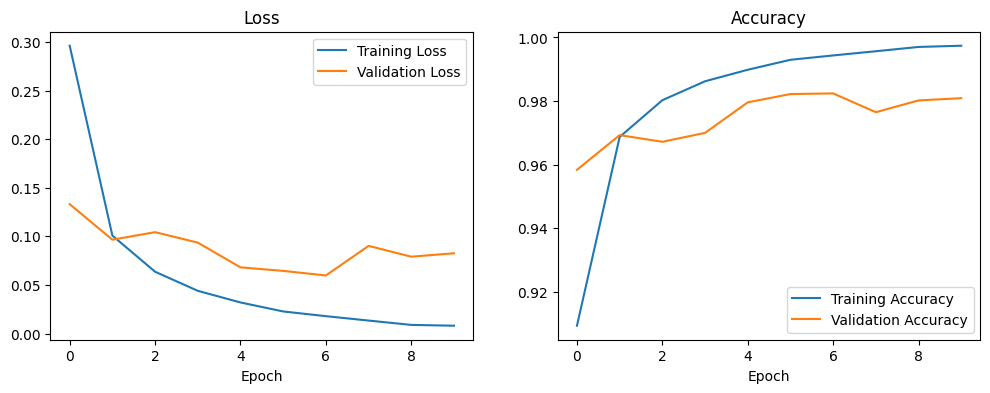

1/1 [==============================] - 0s 77ms/step
Predicted label: 9


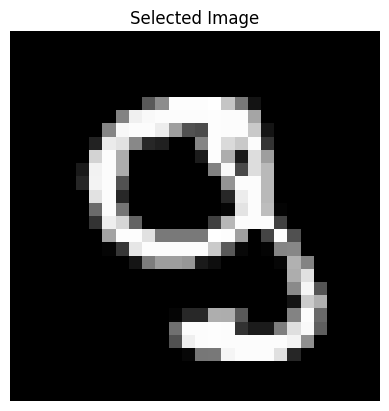

In [21]:
# Use Image Classification on the hand written digits data set (mnist)
# 1. Plot the loss and accuracy for both training data and validation data using the history object in the sourcecode.
# 2. Plot one of the images in the test data, and then do inferencing to check what is the prediction of the model
   # on that single image.

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

# Extract training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()

# select a random image from the test data
idx = np.random.randint(test_data.shape[0])
image = test_data[idx].reshape(28, 28)

# plot the selected image
plt.figure()
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('Selected Image')

# do inferencing to check the model prediction on the selected image
prediction = model.predict(image.reshape(1, 784))
prediction = np.argmax(prediction)

# print the predicted label
print('Predicted label:', prediction)


(28, 28)
784
Epoch 1/10
235/235 [==============================] - 3s 7ms/step - loss: 0.3371 - accuracy: 0.8975 - val_loss: 0.2093 - val_accuracy: 0.9364
Epoch 2/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1501 - accuracy: 0.9546 - val_loss: 0.1524 - val_accuracy: 0.9547
Epoch 3/10
235/235 [==============================] - 1s 6ms/step - loss: 0.1001 - accuracy: 0.9699 - val_loss: 0.1192 - val_accuracy: 0.9629
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0716 - accuracy: 0.9781 - val_loss: 0.1782 - val_accuracy: 0.9437
Epoch 5/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.0720 - val_accuracy: 0.9765
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.0417 - accuracy: 0.9869 - val_loss: 0.1045 - val_accuracy: 0.9669
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.0314 - accuracy: 0.9905 - val_loss: 0.0646 - val_accuracy: 

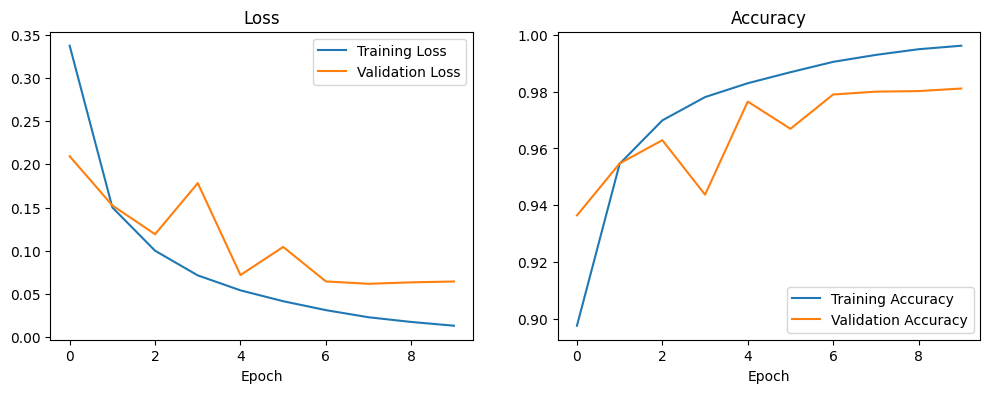

In [6]:
# 3. We had used 2 hidden layers and Relu activation. Try to change the number of hidden layer and the
     #activation to tanh or sigmoid and see what happens.

from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

# Extract training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()


Both the models achieved similar test accuracies of around 98% on the MNIST dataset, But the validation loss and validation accuracy saw some more fluctuations with each epoch


(28, 28)
784
Epoch 1/10
235/235 [==============================] - 3s 6ms/step - loss: 0.3867 - accuracy: 0.8815 - val_loss: 0.3106 - val_accuracy: 0.8994
Epoch 2/10
235/235 [==============================] - 1s 4ms/step - loss: 0.2057 - accuracy: 0.9356 - val_loss: 0.1979 - val_accuracy: 0.9370
Epoch 3/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1644 - accuracy: 0.9486 - val_loss: 0.1747 - val_accuracy: 0.9425
Epoch 4/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1384 - accuracy: 0.9569 - val_loss: 0.1786 - val_accuracy: 0.9463
Epoch 5/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1258 - accuracy: 0.9614 - val_loss: 0.1348 - val_accuracy: 0.9585
Epoch 6/10
235/235 [==============================] - 1s 4ms/step - loss: 0.1120 - accuracy: 0.9650 - val_loss: 0.1378 - val_accuracy: 0.9572
Epoch 7/10
235/235 [==============================] - 1s 5ms/step - loss: 0.1022 - accuracy: 0.9677 - val_loss: 0.1332 - val_accuracy: 

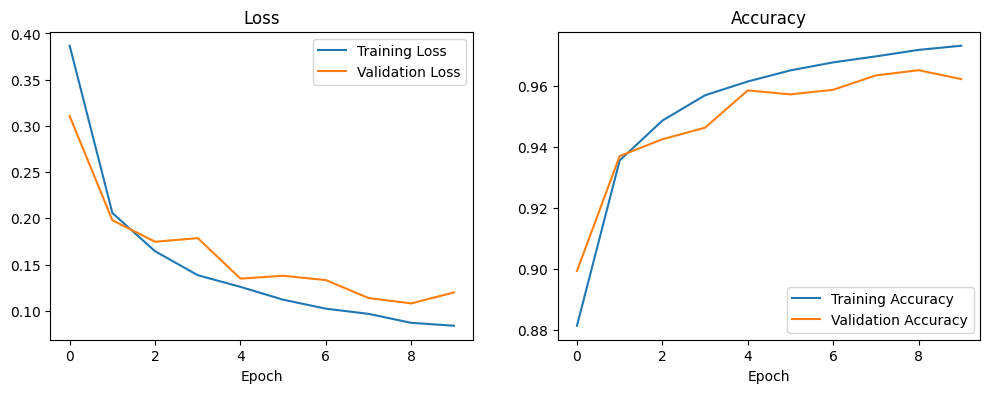

In [7]:
# 4. Run the same code without scaling the images and check the performance?

import matplotlib.pyplot as plt
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
# Process the data
# 1. Convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0], dimData)
test_data = test_images.reshape(test_images.shape[0], dimData)

# Convert data to float (no scaling)
train_data = train_data.astype('float')
test_data = test_data.astype('float')

# Change the labels from integer to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

# Creating network
model = Sequential()
model.add(Dense(512, activation='tanh', input_shape=(dimData,)))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

# Extract training history
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plot loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.show()


Without scaling the images, we can see the some performance differences in validation loss and validation accuracy
